## Entropy

We consider entropy as a way to measure the uncertainty of an experiment's outcome.

Text(0.5, 1.0, 'Low entropy')

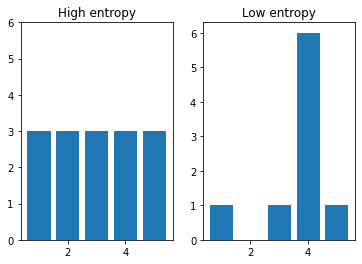

In [26]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.bar([1,2,3,4,5], [3,3,3,3,3])
ax1.set_title('High entropy')
ax1.set_ylim([0,6])


ax2.bar([1,2,3,4,5], [1,0,1,6,1])
ax2.set_title('Low entropy')

Assume we are given discrete distribution with $n$ possible outcomes.

Probability of outcomes: $p_1,p_2,\dots,p_n$

Entropy of distribution: $H(p_1,\dots,p_n) = -\sum^{n}_{i=1}p_i \log_2 p_i$

---

- In classification tasks, the number of possible outcomes is the number of classes $K$.

- Probability to be at the class $k$ - fraction of objects of class $k$

    $p_k=\frac{1}{|R|} \sum_{(x_i,y_i)\in R}[y_i=k]$

- Zero entropy, there are __only__ objects from __one class__ at the leaf

- Max entropy, there are __equal proportion__ of objects from __each class__.

---

Choose split with lower total entropy.

- Decision tree could be constructed in a greedy manner from the root node to the leaves.
- For classification task we could choose a split, so that it minimize class diversity at resulting groups.

## Measures of Impurity

### Gini index

$H(p_1,\dots,p_k) = \sum^{K}_{i=1}p_i(1-p_i)$

- Consider a classifier, which outputs class $k$ with probability $p_k$

- Gini index is a probability that the object will be classfied __incorrectly__ if the class is assigned with probabilities $H(p_1,\dots,p_k)$.

### Impurity criterions

- Compare the impurity before the split and in the two nodes after the split.

$Q(R,j,t) = H(R)-\frac{|R_j|}{|R|}H(R_j) - \frac{|R_r|}{|R|}H(R_r) \to max_{j,t}$ (decrease impurity as much as possible)

- Entropy and gini for Classification tasks.
- For regression tasks, $H(R)$ can also be variance

$H(R) = min_c\frac{1}{|R|}\sum_{y\in R}l(y,c)$ impurity cretirion

__Impurity Criterion for Regression__

$l(y,c) = (y-c)^2$ loss function

$min_c\frac{1}{|R|} \sum_{y \in R}(y-c)^2 \implies c^* = \bar{y} = \frac{1}{|R|}\sum_{y\in R}y$ optimal value for constant prediction.

$H(R) = \frac{1}{|R|} \sum_{y \in R}(y-\bar{y})^2$ formula for the variance

__Impurity Criterion for Classification__

$\mathbb{Y} = \{1,\dots, K\}$

$P_k = \frac{1}{|R|}\sum_{y\in R}[y=k]$ proportion of objects in this class.

We have two options, A predict a class or B predict distribution of each class

A. $c\in \{1,\dots, K\}$

B. $c = (c_1, \dots, c_K), \sum^{K}_{k=1}c_k=1$

A: 

$l(y,c) = [y\neq c]$

$min_c\frac{1}{|R|} \sum_{y\in R}[y \ne c] \implies c^* = argmax_k P_k \implies k^*$

$H(R) = \frac{1}{|R|} \sum_{y\in R} [y\ne k^*]$ what is the proportion of objects which does not belong to the most popular class, $k^*$

$=1-P_{k^*}$

such measure of impurity is actually not a really good idea. e.g.  case 1 [0.7,0.3,0], case 2 [0.7,0.15,0.15], 
$1-P_{k^*}$ is the same for both cases, but case 1 is better in practice.

B:

$l(y,c) = - \log(\prod^K_{k=1}c^{[y=k]}_k) = -\sum^K_{k=1} [y=k] \log c_k$

$min_c = \frac{1}{|R|} \sum^K_{k=1} [y=k] \log c_k$, s.t. $\sum^K_{k=1} c_k = 1$

$c^* = (p_1, \dots, p_k)$ optimal solution equal exactly to the proportion of observations that we have in our set.

__$H(R) = -\sum^K_{k=1} p_k(\log p_k)$__

## Greedy Tree Construction

__Stop criterions__

- Restrict the maximal depth
- Restrict the number of leaves
- Fix the minimal number of objects in the node
- Set the minimal decrease in the diversity when splitting.

__Greedy Algorithm__

1. Put the whole dataset into the root: $R_1= X$

2. Start the tree construction: SplitNode$(1,R_1)$

SplitNode$(1,R_1)$:

1. If stopping criterion is met, then quit

2. Find the best split (feature and threshold): $j,t=argmax_{j,t}Q(R_m,j,t)$

3. Split objects: $R_l = \{ (x,y) \in R_m | [x_j < t] \}, R_r = \{ (x,y) \in R_m | [x_j \ge t]\} $

4. Repeat for the child nodes: SplitNode$(l, R_l)$ and SplitNode$(r, R_r)$

The algorithm is quite complex and requires brute force of all the split at each step

 ## High Variance of Decision Trees
 
 High variance and lack of smoothness